In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (50.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and di

In [ ]:
# 런타임 다시시작

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 사용할 라이브러리 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
donut = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1016/donut1_3개_gap.csv', encoding='cp949', index_col=0)
donut2 = donut[['성별','연령대', '구매금액_1_3P', '구매금액_1_3P_A',
       '구매금액_1_3P_B','구매금액_1_3P_C', '구매금액_1_3P_D', '가구/가전/전자기기_1_3P',
       '기타_1_3P', '생활/건강_1_3P','식품_1_3P', '의류/잡화_1_3P',
       '반려/취미/문구/도서_1_3P', '스포츠/레저/자동차_1_3P', '출산유아동_1_3P','방문횟수_1_3P','상위10%물품_1_3P','구매변동_1-4','구매변동_1-3']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 독립 종속 분리 / 고객번호 분리
X = pizza.drop(['고객번호','구매변동_1-4'],axis=1)
y = pizza['구매변동_1-4']

In [ ]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

Feature importances:
[0.011 0.038 0.035 0.033 0.048 0.051 0.02  0.06  0.058 0.067 0.035 0.047
 0.052 0.058 0.049 0.044 0.03  0.042 0.222]
성별 : 0.011
연령대 : 0.038
구매금액_1_3P : 0.035
구매금액_1_3P_A : 0.033
구매금액_1_3P_B : 0.048
구매금액_1_3P_C : 0.051
구매금액_1_3P_D : 0.020
가구/가전/전자기기_1_3P : 0.060
기타_1_3P : 0.058
생활/건강_1_3P : 0.067
식품_1_3P : 0.035
의류/잡화_1_3P : 0.047
반려/취미/문구/도서_1_3P : 0.052
스포츠/레저/자동차_1_3P : 0.058
출산유아동_1_3P : 0.049
방문횟수_1_3P : 0.044
중분류갯수_1_3P : 0.030
상위10%물품_1_3P : 0.042
구매변동_1-3 : 0.222


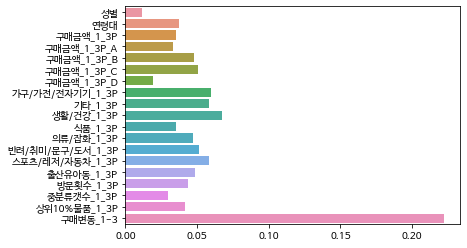

In [ ]:
import numpy as np
# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(X.columns , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=X.columns)

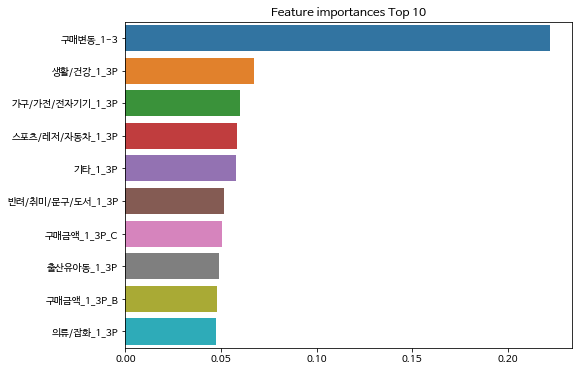

In [ ]:
ftr_importances_values = dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10 , y = ftr_top10.index)
plt.show()

In [ ]:
# top 10의 독립 종속 분리
X10 = pizza[['구매변동_1-3','생활/건강_1_3P','스포츠/레저/자동차_1_3P','가구/가전/전자기기_1_3P','기타_1_3P','의류/잡화_1_3P','구매금액_1_3P_B','상위10%물품_1_3P','출산유아동_1_3P']]
y10 = pizza['구매변동_1-4']

In [ ]:
# top 10의 DecisionTree Classifier 생성
dt_clf10 = DecisionTreeClassifier(max_depth=3, random_state=156)

X_train, X_test, y_train, y_test = train_test_split(X10,y10,test_size=0.2, random_state=11)

dt_clf10.fit(X_train, y_train)

# 점수 출력
print("Train set 정확도 : {:.2f}".format(dt_clf10.score(X_train, y_train)))
print("Test set 정확도 : {:.2f}".format(dt_clf10.score(X_test, y_test)))

Train set 정확도 : 0.74
Test set 정확도 : 0.74


In [ ]:
from sklearn.tree import export_graphviz
# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일을 설정
export_graphviz(dt_clf10, out_file="tree.dot", class_names = ['0','1'], feature_names = X10.columns, impurity=True, filled=True)

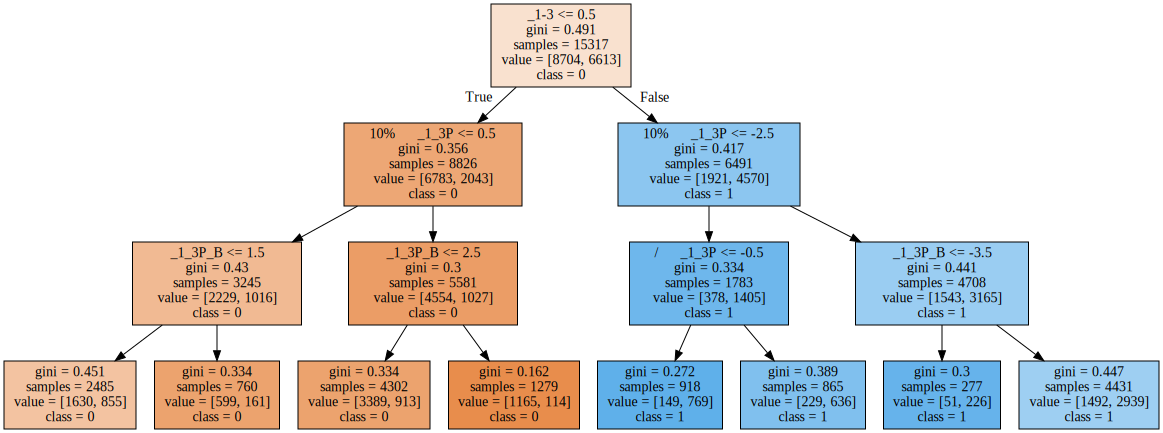

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# 트리이미지 다운로드
import pydot
(graph,) = pydot.graph_from_dot_file('tree.dot', encoding='utf8')
graph.write_png('1tree.dot.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance as xgb_importance
from lightgbm import plot_importance as lgbm_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

def random_modeling(data,model):

  y = data[['구매변동_1-4']]
  x = data.drop(['구매변동_1-4'],axis=1)



  X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
  dt_clf = DecisionTreeClassifier(random_state=0)
  lr_clf = LogisticRegression(random_state=0, n_jobs=-1)
  xgb_clf = XGBClassifier(random_state=0, n_jobs=-1)
  lgbm_clf = LGBMClassifier(random_state=0, n_jobs=-1)

  if model == 'rf':  
    
    rf_clf.fit(X_train,y_train)
    rf_pred = rf_clf.predict(X_test)
    rf_pred_proba = rf_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,rf_pred)
    precision = precision_score(y_test,rf_pred)
    recall = recall_score(y_test,rf_pred)
    f1 = f1_score(y_test,rf_pred)
    roc = roc_auc_score(y_test,rf_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    rf_clf_params ={
        'n_estimators':[int(x) for x in range(1,1000,10)],
        'max_features':['log2','sqrt'],
        'max_depth':[int(i) for i in range(1, 200)],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5],
        'bootstrap':[True, False]
    }

    rf_random_cv = RandomizedSearchCV(rf_clf, param_distributions=rf_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    rf_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',rf_random_cv.best_params_)
    print('최고의 정확도 :',rf_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(rf_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-4'],axis=1).columns , ax=ax)

  elif model == 'dt':
    
    dt_clf.fit(X_train,y_train)
    dt_pred = dt_clf.predict(X_test)
    dt_pred_proba = dt_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,dt_pred)
    precision = precision_score(y_test,dt_pred)
    recall = recall_score(y_test,dt_pred)
    f1 = f1_score(y_test,dt_pred)
    roc = roc_auc_score(y_test,dt_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    dt_clf_params ={
        'max_features':['log2','sqrt','auto'],
        'criterion':['gini', 'entropy'],
        'max_depth':[int(i) for i in range(1, 200)],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    dt_random_cv = RandomizedSearchCV(dt_clf, param_distributions=dt_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    dt_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',dt_random_cv.best_params_)
    print('최고의 정확도 :',dt_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(dt_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-4'],axis=1).columns , ax=ax)
 
  elif model == 'lr':
    
    lr_clf.fit(X_train,y_train)
    lr_pred = lr_clf.predict(X_test)
    lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,lr_pred)
    precision = precision_score(y_test,lr_pred)
    recall = recall_score(y_test,lr_pred)
    f1 = f1_score(y_test,lr_pred)
    roc = roc_auc_score(y_test,lr_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    lr_clf_params ={
        'fit_intercept':[True,False],
        'normalize':[True,False],

    }

    lr_random_cv = RandomizedSearchCV(lr_clf, param_distributions=lr_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    lr_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lr_random_cv.best_params_)
    print('최고의 정확도 :',lr_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(lr_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-4'],axis=1).columns , ax=ax)

  elif model == 'xgb':
    
    evals = [(X_test,y_test)]
    xgb_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    xgb_pred = xgb_clf.predict(X_test)
    xgb_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,xgb_pred)
    precision = precision_score(y_test,xgb_pred)
    recall = recall_score(y_test,xgb_pred)
    f1 = f1_score(y_test,xgb_pred)
    roc = roc_auc_score(y_test,xgb_pred)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    xgb_clf_params ={
        'n_estimators':[int(i) for i in range(1,1000,5)],
        'learning_rate':[0.001,0.01,0.1,1,10,100],
        'max_depth':[int(i) for i in range(1,100)],
        'min_child_samples':[int(i) for i in range(1,20)],
        'num_leaves':[int(i) for i in range(1,100,5)]
    }

    xgb_random_cv = RandomizedSearchCV(xgb_clf, param_distributions=xgb_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    xgb_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',xgb_random_cv.best_params_)
    print('최고의 정확도 :',xgb_random_cv.best_score_)

    fig, ax = plt.subplots(figsize=(10, 12))
    xgb_importance(xgb_clf, ax=ax)

  elif model == 'lgbm':
    
    evals = [(X_test,y_test)]
    lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    lgbm_pred = lgbm_clf.predict(X_test)
    lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,lgbm_pred)
    precision = precision_score(y_test,lgbm_pred)
    recall = recall_score(y_test,lgbm_pred)
    f1 = f1_score(y_test,lgbm_pred)
    roc = roc_auc_score(y_test,lgbm_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    lgbm_clf_params ={
        'n_estimators':[int(i) for i in range(1,1000,5)],
        'learning_rate':[0.001,0.01,0.1,1,10,100],
        'max_depth':[int(i) for i in range(1,100)],
        'min_child_samples':[int(i) for i in range(1,20)],
        'num_leaves':[int(i) for i in range(1,100,5)]
    }

    lgbm_random_cv = RandomizedSearchCV(lgbm_clf, param_distributions=lgbm_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    lgbm_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lgbm_random_cv.best_params_)
    print('최고의 정확도 :',lgbm_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    lgbm_importance(lgbm_clf, ax=ax)

  else :
    print('모델 인자 값을 확인하세요')

dt 정확도 :  0.6235
dt 정밀도 :  0.5725
dt 재현율 :  0.5513
dt f1 :  0.5617
dt ROC_AUC :  0.6162
최적의 파라미터 : {'min_samples_split': 4, 'min_samples_leaf': 40, 'max_features': 'auto', 'max_depth': 48, 'criterion': 'entropy'}
최고의 정확도 : 0.7318667015431979
rf 정확도 :  0.7227
rf 정밀도 :  0.6924
rf 재현율 :  0.6593
rf f1 :  0.6754
rf ROC_AUC :  0.7793
최적의 파라미터 : {'n_estimators': 11, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 145, 'bootstrap': False}
최고의 정확도 : 0.7407455288188138
xgb 정확도 :  0.7389
xgb 정밀도 :  0.7094
xgb 재현율 :  0.6832
xgb f1 :  0.696
xgb ROC_AUC :  0.7327
최적의 파라미터 : {'num_leaves': 6, 'n_estimators': 806, 'min_child_samples': 16, 'max_depth': 6, 'learning_rate': 0.1}
최고의 정확도 : 0.7092120451153914
lgbm 정확도 :  0.7379
lgbm 정밀도 :  0.7059
lgbm 재현율 :  0.6874
lgbm f1 :  0.6965
lgbm ROC_AUC :  0.7953
최적의 파라미터 : {'num_leaves': 6, 'n_estimators': 616, 'min_child_samples': 14, 'max_depth': 52, 'learning_rate': 0.001}
최고의 정확도 : 0.7404843725485963


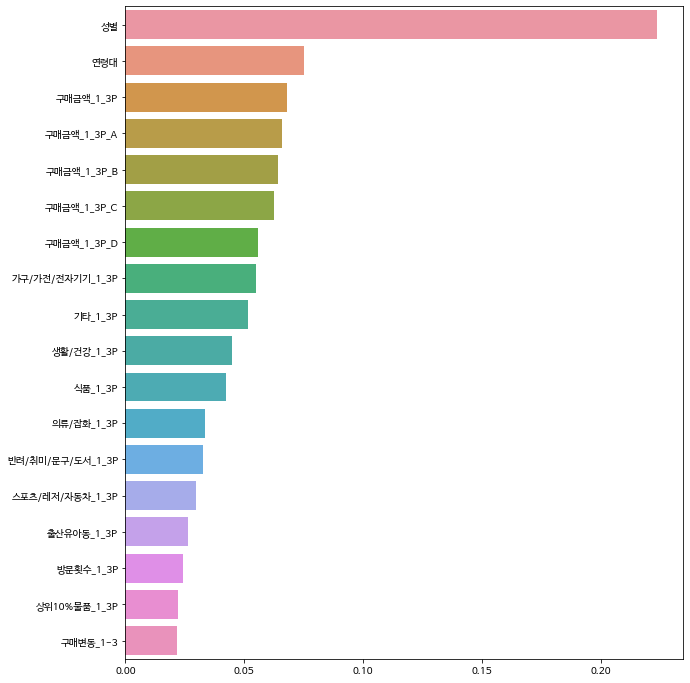

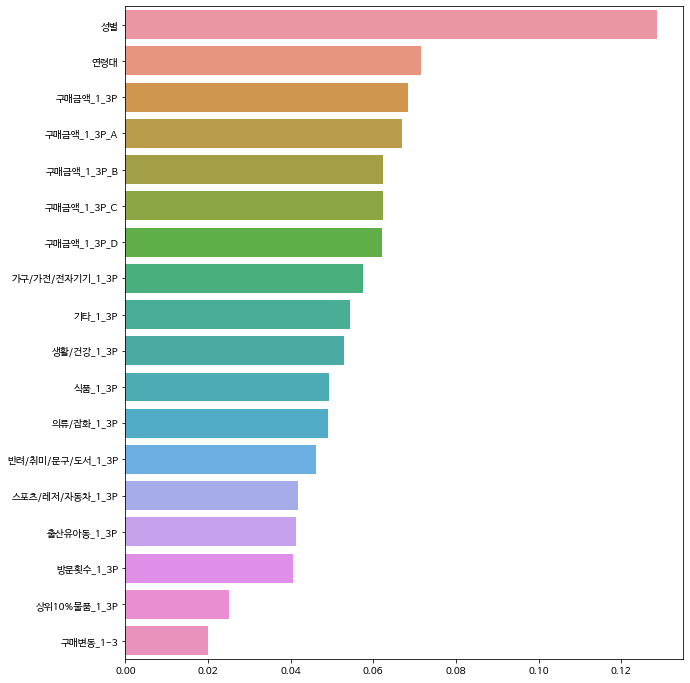

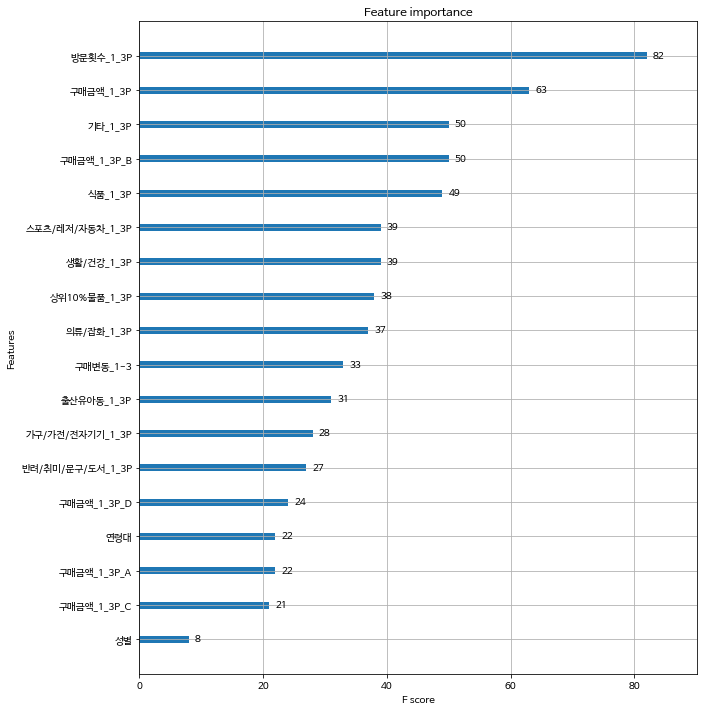

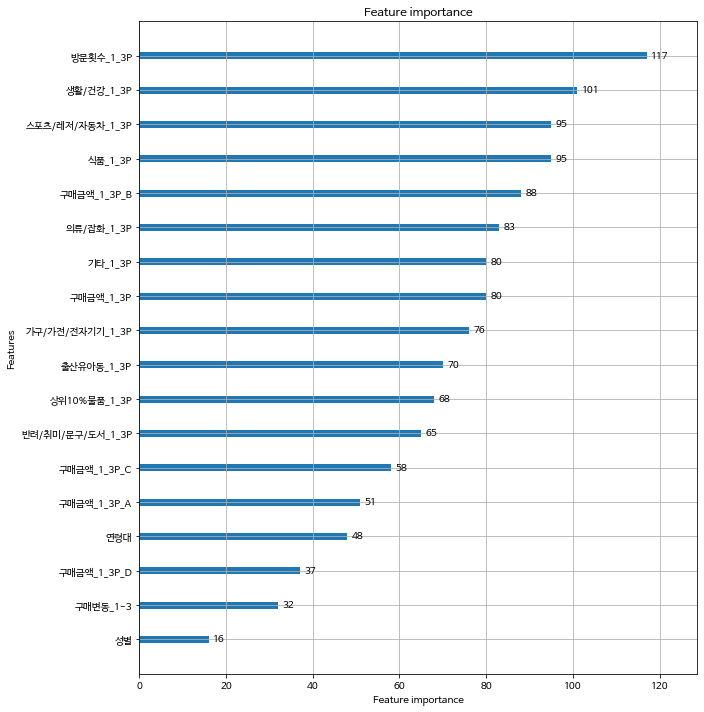

In [ ]:
li = ['dt','rf','xgb','lgbm']
for i in li:
  random_modeling(donut2,i)